In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

E:\anoconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
E:\anoconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\anoconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\anoconda\envs\tensorflow\lib\site-packages\tensorflow\pytho

In [3]:
feanum=2
window=3
df2=pd.read_excel('data00.xlsx') 
df1=df2.iloc[:,:]
rate_origin=df1['去除日内周期电力负荷']#用于反归一化
df=(df1-df1.min())/(df1.max()-df1.min())
df.tail()

,气温差分,去除日内周期电力负荷
35034,0.412665,0.542915
35035,0.413361,0.551268
35036,0.412665,0.559999
35037,0.411969,0.516276
35038,0.411969,0.520177


In [4]:
stock=df
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.as_matrix() #pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度5+1
result = []
for index in range(len(data) - sequence_length):#循环170-5次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到161个样本，样本形式为6天*3特征
cut=96*4#划分训练集测试集
train = result[:-cut, :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[-cut:, :-1]
y_test = result[-cut:, -1][:,-1]
#reshape成 5天*3特征
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

E:\anoconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [5]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (34651, 3, 2)
y_train (34651,)
X_test (384, 3, 2)
y_test (384,)


In [6]:
d = 0.001
model = Sequential()
model.add(LSTM(16, input_shape=(window, feanum), return_sequences=True))
model.add(Dropout(d))
model.add(LSTM(8, input_shape=(window, feanum), return_sequences=False))
model.add(Dropout(d))
model.add(Dense(4,init='uniform',activation='relu'))        
model.add(Dense(1,init='uniform',activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch =10, batch_size = 256) #训练模型1000次

W0404 17:22:08.511204 13324 deprecation_wrapper.py:119] From E:\anoconda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0404 17:22:08.541123 13324 deprecation_wrapper.py:119] From E:\anoconda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0404 17:22:08.545113 13324 deprecation_wrapper.py:119] From E:\anoconda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0404 17:22:08.884206 13324 deprecation_wrapper.py:119] From E:\anoconda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0404 17:22:08.895178 13324 deprec

Epoch 1/10
34651/34651 [==============================] - 4s 107us/step - loss: 0.1426 - acc: 2.8859e-05
Epoch 2/10
34651/34651 [==============================] - 1s 33us/step - loss: 0.0038 - acc: 2.8859e-05
Epoch 3/10
34651/34651 [==============================] - 1s 31us/step - loss: 0.0037 - acc: 2.8859e-05
Epoch 4/10
34651/34651 [==============================] - 1s 32us/step - loss: 0.0036 - acc: 2.8859e-05
Epoch 5/10
34651/34651 [==============================] - 1s 32us/step - loss: 0.0034 - acc: 2.8859e-05
Epoch 6/10
34651/34651 [==============================] - 1s 32us/step - loss: 0.0032 - acc: 2.8859e-05
Epoch 7/10
34651/34651 [==============================] - 1s 33us/step - loss: 0.0028 - acc: 2.8859e-05
Epoch 8/10
34651/34651 [==============================] - 1s 32us/step - loss: 0.0020 - acc: 2.8859e-05
Epoch 9/10
34651/34651 [==============================] - 1s 32us/step - loss: 0.0012 - acc: 5.7718e-05
Epoch 10/10
34651/34651 [==============================] - 1s 3

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 16)             1216      
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 16)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 2,057
Trainable params: 2,057
Non-trainable params: 0
_________________________________________________________________


In [8]:
y_train_predict=model.predict(X_train)[:,0]
y_train=y_train#[:,0]

Text(0.5,1,'Train Data')

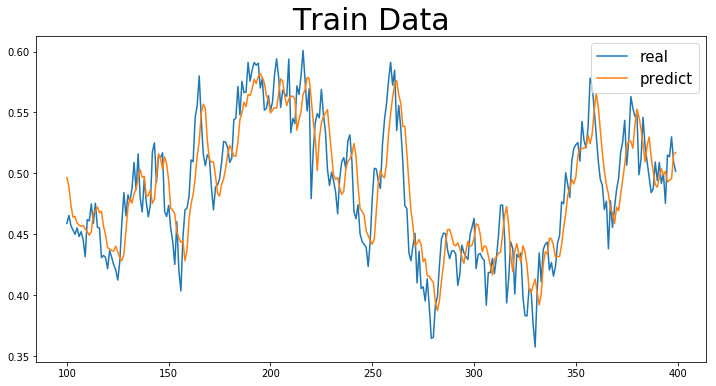

In [9]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:400,0].plot(figsize=(12,6))
draw.iloc[100:400,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

In [10]:
y_test_predict=model.predict(X_test)[:,0]
y_test=y_test

Text(0.5,1,'Test Data')

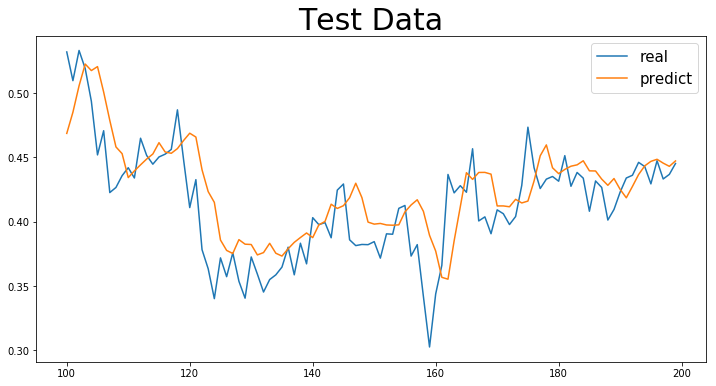

In [11]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[100:200,0].plot(figsize=(12,6))
draw.iloc[100:200,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('训练集上的MAE和MSE')
print(mean_absolute_error(model.predict(X_train), y_train))
print(mean_squared_error(model.predict(X_train), y_train) )
print('测试集上的MAE和MSE')
print(mean_absolute_error(model.predict(X_test), y_test))
print(mean_squared_error(model.predict(X_test), y_test) )

训练集上的MAE和MSE
0.02278198592990026
0.001027027903477712
测试集上的MAE和MSE
0.023005044930627116
0.000861786705322953


In [13]:
out=y_test_predict*(rate_origin.max()-rate_origin.min())+rate_origin.min()
df0 = pd.DataFrame(out,columns=['predict'])

In [14]:
df00=pd.read_excel('data.xlsx') 
df00=df00.iloc[-384:,1:3]
df000=pd.DataFrame(df00.values,columns=['electrcity','date'])
df0000=pd.concat([df000, df0],axis=1)
df0000.tail()

,electrcity,date,predict
379,10881.9905,10793.52,1.002151
380,10871.7511,10763.88,1.001050
381,10890.5559,10762.17,1.000805
382,10757.4210,10731.92,1.003213
383,10765.7453,10731.10,1.008484


In [15]:
real=df0000['date']*df0000['predict']
real=pd.DataFrame(real,columns=['real'])
draw=pd.concat([df0000['electrcity'],real],axis=1)
draw.tail()

,electrcity,real
379,10881.9905,10816.739569
380,10871.7511,10775.184591
381,10890.5559,10770.833766
382,10757.4210,10766.406012
383,10765.7453,10822.137599


Text(0.5,1,'Test Data')

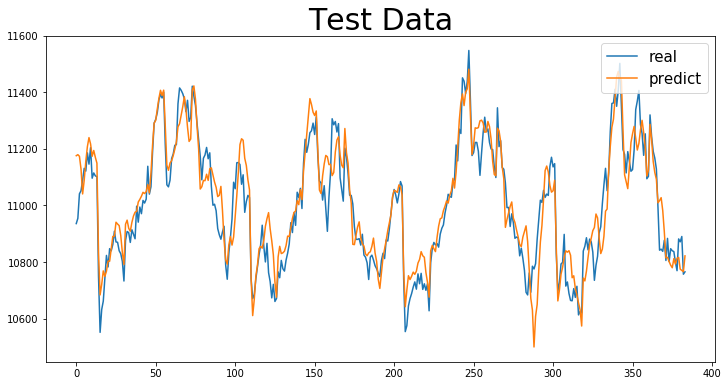

In [16]:
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('测试集上MAE\MSE\RMSE\MAPE')
print(mean_absolute_error(draw.iloc[:,0], draw.iloc[:,1]))
print(mean_squared_error(draw.iloc[:,0], draw.iloc[:,1]) )
print(math.sqrt(mean_squared_error(draw.iloc[:,0], draw.iloc[:,1])))
print(mape(draw.iloc[:,0], draw.iloc[:,1]) )

测试集上MAE\MSE\RMSE\MAPE
63.20905319794781
6778.469933663827
82.33146381344028
0.5757253733971888
